## Influence of religion in crime rates and political parties in US electorade.
The idea of this little research is to see if there is any correlation between the religiosity of a state and its
preference to a certain political party and also with its crime rates. Therefore, the region of study is limited to the Region of United States of America (The country) by states. 

Datasets:
I found different sources of data related with religion, politics demographic and finally, crime rates. It is important to mention that I did'nt found this tables extremely accurate (in my opinion) since there are factors that are similar and do not match each other in a significant way when I consider they should.

* https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_religiosity
* https://www.pewforum.org/religious-landscape-study/compare/belief-in-god/by/state/
* https://www.pewforum.org/religious-landscape-study/compare/party-affiliation/by/state/
* https://en.wikipedia.org/wiki/List_of_United_States_cities_by_crime_rate

### Import modules

In [1]:
from csv import reader
import csv
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

### Writting some routines for reading files or tables

In [2]:
def readCrimebyState():
    lines = []
    with open("data/crimebystate.txt") as csvfile:
        # create a csv reader object
        csv_reader = reader(csvfile)
        counter = 0
        for line in csv_reader:
            if counter >= 5:
                lines.append(line)
            counter += 1

        header = ["state", "city", 
                  "population", 
                  "totalviolentcrime", "murder","rape" ,"robber", "assault","totalprivatecrime", "bulgary", "larcery", "vehicle", "arson"]


        return pd.DataFrame([line[0].strip().split("\t") for line in lines], columns=header)
    
def getDataByReligiosity():
    lines = []
    with open("data/religosityByState.txt") as csvfile:
        # create a csv reader object
        csv_reader = reader(csvfile)
        counter = 0
        for line in csv_reader:
            if counter >= 4:
                lines.append(line)
            counter += 1
        
        header = ["state", "rank by population", 
                  "percentage stating that religion is very important", 
                  "Rank by religiosity", "Percent religious"]
        return pd.DataFrame([line[0].strip().split("\t") for line in lines], columns=header)

def readTxtFile(filename):
    headers = []
    lines = []
    with open(filename) as csvfile:

        # create a csv reader object
        csv_reader = reader(csvfile)
        # extract headers
        headers = [x.strip() for x in next(csv_reader)]
        # go over each line 
        for line in csv_reader:
            lines.append(line)
        
    return pd.DataFrame(data=[line[0].split(sep="\t") for line in lines], columns=headers[0].split(sep="\t"))


In [3]:
def cleanValue(x):
    try: 
        return float(x)
    except:
        return np.nan

### Religion dataset
Two data set were found about religion.
The first one could be seen in the files of this repository with the name of "beliefInGod.txt".

In the following cell can be observed the raw dataset, apparently it comprised the results from a survey about religion. The columns tells about the percentage of belief in God of people in each state. As it can be seen, 
there are different levels of certainty. 

Since the main goal of this little research is to look for the religion influence in other matters, only the
"Believe in God; absolutely certain" was chosen, merely because it offered the group of people with most
conviction in God and therefore, in religion. 

One of the implicit hypothesis statements is that states with higher percentage of people that truly beleive in 
God has a higher probability of a certain political party and also, as society tend to be safer that those ones 
that don't have most of the religous people. 

In [16]:
# Reading file
belief_in_god_df = readTxtFile(filename='data/beliefInGod.txt')
belief_in_god_df.head()

,State,Believe in God; absolutely certain,Believe in God; fairly certain,Believe in God; not too/not at all certain,Believe in God; don't know,Do not believe in God,Other/don't know if they believe in God,Sample Size
0,Alabama,82%,12%,2%,1%,2%,2%,511
1,Alaska,55%,24%,5%,1%,12%,3%,310
2,Arizona,62%,20%,6%,< 1%,10%,2%,653
3,Arkansas,77%,15%,2%,< 1%,4%,1%,311
4,California,54%,22%,8%,1%,12%,2%,3


#### Cleaning and data selection:

All columns are deleted except two. Column names are changed and strings numbers are converted to integer type. 

In [22]:
belief_in_god_df = readTxtFile(filename='data/beliefInGod.txt').drop(['Sample Size'], axis=1).applymap(lambda x: re.sub("%", "", x))\
                                            .rename(columns = {'State':'state', "Believe in God; absolutely certain":"percentage believe in god"}) \
                                            [["state", "percentage believe in god"]]

belief_in_god_df["percentage believe in god"] = belief_in_god_df["percentage believe in god"].map(lambda x: int(x))
belief_in_god_df.head()

,state,percentage believe in god
0,Alabama,82
1,Alaska,55
2,Arizona,62
3,Arkansas,77
4,California,54


#### There is also a second dataframe about religion.
This one is more focused in a term called religiosity, which what it was considered as it encompassed the attendance of the church and the
willingness of go to a religious events of the people. 

Columns:
* state: State of US.
* rank by population: general population rank
* percentage stating that religion is very important: it is self-explanatory but also, it is important to make emphasis that this not necessary implies someone believe in God or not, just that the person considers religion important for society. 
* Rank by reliogisity: this column it is related with the statement explained above about religiosity.
* Percent religious: percentage of religous people in the state.

In [21]:
getDataByReligiosity().head()

,state,rank by population,percentage stating that religion is very important,Rank by religiosity,Percent religious
0,California,1,73%,45,73%
1,Texas,2,86%,13,82%
2,Florida,3,78%,36,76%
3,New York,4,72%,43,73%
4,Illinois,5,77%,30,78%


#### Cleaning and data selection:

Special symbols and nan values are deleted. Column names changes. 

In [26]:
religiosity_df = getDataByReligiosity().replace("—",np.nan).dropna()
religiosity_df = religiosity_df.applymap(lambda x: re.sub("%", "", x))
religiosity_df = religiosity_df.set_index("state")
religiosity_df = religiosity_df[["rank by population", "percentage stating that religion is very important", "Rank by religiosity", "Percent religious"]].applymap(lambda x: int(x))
religiosity_df = religiosity_df.reset_index()
religion_df.head()

,state,percentage believe in god,rank by population,percentage stating that religion is very important,Rank by religiosity,Percent religious
0,Alabama,82,23,90,6,88
1,Alaska,55,48,70,52,69
2,Arizona,62,15,75,44,73
3,Arkansas,77,33,86,10,82
4,California,54,1,73,45,73


#### Both religion datasets are merged

In [28]:
religion_df = pd.merge(belief_in_god_df, religiosity_df, on="state")
religion_df.head()

,state,percentage believe in god,rank by population,percentage stating that religion is very important,Rank by religiosity,Percent religious
0,Alabama,82,23,90,6,88
1,Alaska,55,48,70,52,69
2,Arizona,62,15,75,44,73
3,Arkansas,77,33,86,10,82
4,California,54,1,73,45,73


### Datasate of party affliliation for each state in United States

Columns:
* state: State in US. 
* Republican/lean Rep.: Percentange of people in favor of republican party in each state. 
* No lean: Percentage of people not in favor with either democrat or republican party. 
* Democrat/lean Dem.: Percentage of people in favor of democrat party in each state
* Sample Size: Quantity of people took the survey in each state.

In [32]:
readTxtFile(filename='data/partyAffiliation.txt').head()

,State,Republican/lean Rep.,No lean,Democrat/lean Dem.,Sample Size
0,Alabama,52%,13%,35%,511
1,Alaska,39%,29%,32%,310
2,Arizona,40%,21%,39%,653
3,Arkansas,46%,16%,38%,311
4,California,30%,21%,49%,3


#### Cleaning and data selection:

Special symbols and nan values are deleted. Column names changes.

In [35]:
party_affiliation_df = readTxtFile(filename='data/partyAffiliation.txt').drop(["Sample Size"], axis=1).applymap(lambda x: re.sub("%", "", x)) \
                                                .rename(columns= {"State": "state", "Republican/lean Rep.": "republicans", "No lean":"neither", "Democrat/lean Dem.": "democrats"})

party_affiliation_df[["republicans", "neither", "democrats"]] = party_affiliation_df[["republicans", "neither", "democrats"]].applymap(lambda x: int(x))
party_affiliation_df.head()

,state,republicans,neither,democrats
0,Alabama,52,13,35
1,Alaska,39,29,32
2,Arizona,40,21,39
3,Arkansas,46,16,38
4,California,30,21,49


### Merge between religion and politics

In [43]:
religion_politics_df = pd.merge(religion_df, party_affiliation_df)
religion_politics_df.head()

,state,percentage believe in god,rank by population,percentage stating that religion is very important,Rank by religiosity,Percent religious,republicans,neither,democrats
0,Alabama,82,23,90,6,88,52,13,35
1,Alaska,55,48,70,52,69,39,29,32
2,Arizona,62,15,75,44,73,40,21,39
3,Arkansas,77,33,86,10,82,46,16,38
4,California,54,1,73,45,73,30,21,49


Text(0, 0.5, 'democrats')

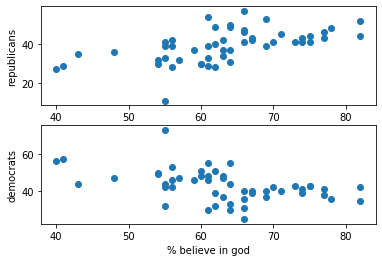

In [9]:
plt.subplot(2, 1, 1)
plt.scatter(df["percentage believe in god"], df["republicans"])

plt.ylabel("republicans")
plt.subplot(2, 1, 2)

plt.scatter(df["percentage believe in god"], df["democrats"])
plt.xlabel("% believe in god")
plt.ylabel('democrats')

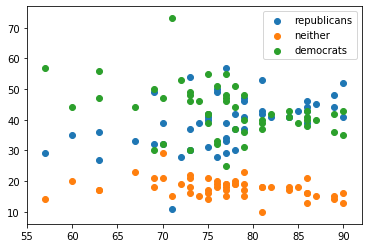

In [10]:
plt.scatter(df["percentage stating that religion is very important"], df["republicans"])
plt.scatter(df["percentage stating that religion is very important"], df["neither"])
plt.scatter(df["percentage stating that religion is very important"], df["democrats"])
plt.legend(["republicans", "neither", "democrats"])

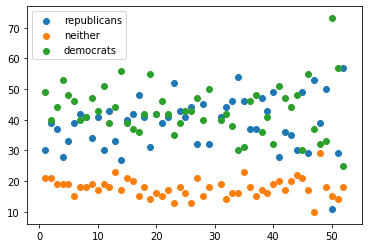

In [11]:
plt.scatter(df["rank by population"], df["republicans"])
plt.scatter(df["rank by population"], df["neither"])
plt.scatter(df["rank by population"], df["democrats"])
plt.legend(["republicans", "neither", "democrats"])

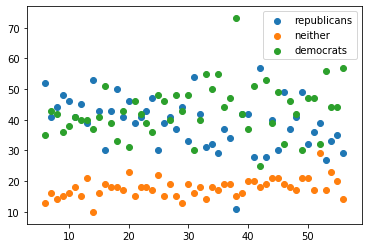

In [12]:
plt.scatter(df["Rank by religiosity"], df["republicans"])
plt.scatter(df["Rank by religiosity"], df["neither"])
plt.scatter(df["Rank by religiosity"], df["democrats"])
plt.legend(["republicans", "neither", "democrats"])

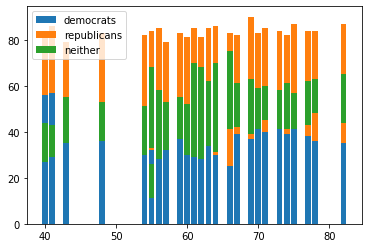

In [13]:
plt.bar(df["percentage believe in god"], df["democrats"])
plt.bar(df["percentage believe in god"], df["republicans"], bottom=df["democrats"])
plt.bar(df["percentage believe in god"], df["neither"], bottom=df["republicans"])
plt.legend(["democrats","republicans", "neither"])

,state,population,crimes,state_rate,percentage believe in god,rank by population,percentage stating that religion is very important,Rank by religiosity,Percent religious
0,Alabama,248431.0,6194.08,0.024933,82,23,90,6,88
15,Louisiana,624850.0,11986.09,0.019182,75,25,90,7,87
30,Tennessee,1327707.0,13257.28,0.009985,78,17,89,9,86
7,Georgia,724284.0,9606.10,0.013263,74,8,84,11,82
27,Oklahoma,1053128.0,11036.29,0.010480,71,28,87,12,82
31,Texas,9487203.0,43100.11,0.004543,69,2,86,13,82
23,New Jersey,551579.0,5607.95,0.010167,60,11,78,16,82
13,Kansas,391084.0,6557.93,0.016769,66,35,79,20,80
19,Minnesota,725667.0,9958.87,0.013724,56,21,74,21,80
20,Missouri,795232.0,14391.63,0.018097,70,18,82,22,80


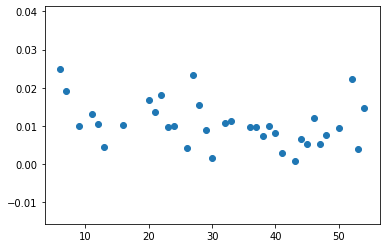

In [14]:
crime_religion_df = pd.merge(crime_df, religion_df, on="state")
variable = "Rank by religiosity"
crime_religion_df = crime_religion_df.sort_values(variable)
plt.scatter(crime_religion_df[variable], crime_religion_df["state_rate"])
crime_religion_df

In [4]:
crime_df = readCrimebyState().replace(to_replace='None', value=np.nan)
crime_df[["population", "totalviolentcrime", "totalprivatecrime"]] = crime_df[["population", "totalviolentcrime", "totalprivatecrime"]].applymap(cleanValue).dropna()
crime_df = crime_df[crime_df["state"] != "North Carolina8"]

# Getting total number of crimes registered in each state
crime_df["crimes"] = crime_df["totalviolentcrime"] + crime_df["totalprivatecrime"]
t = crime_df[["state", "crimes"]].groupby(["state"]).sum() 

#crime_df["population"] = crime_df[["population"]].apply(lambda x: int(x))
crime_df = crime_df[["state", "population"]].groupby(["state"]).sum() 
crime_df = pd.merge(crime_df, t, on="state")
crime_df = crime_df.reset_index()
crime_df["state_rate"] = crime_df["crimes"] / crime_df["population"]

,state,population,crimes,state_rate
0,Alabama,248431.0,6194.08,0.024933
1,Alaska,296188.0,6619.11,0.022348
2,Arizona,3661326.0,24481.21,0.006686
3,California,12197770.0,64772.27,0.005310
4,Colorado,1547592.0,11695.65,0.007557
5,District of Columbia,693972.0,5104.96,0.007356
6,Florida,2527961.0,24723.06,0.009780
7,Georgia,724284.0,9606.10,0.013263
8,Hawaii,990384.0,3020.75,0.003050
9,Idaho,225677.0,2723.80,0.012069
